# Exchange Rate Visualization

Here we will be working on a dataset from 1999-2022 which contains information on the exchange rate between the Euro and multiple currencies. The dataset can be found [here](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020) as it was made publicly available on kaggle by Daria Chemkaeva.

In [1]:
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 50

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data0 = pd.read_csv('D:/Library/datasci/datasets/euro-daily-hist_1999_2022.csv')
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6229 entries, 0 to 6228
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6229 non-null   object 
 1   [Australian dollar ]      6229 non-null   object 
 2   [Bulgarian lev ]          5827 non-null   object 
 3   [Brazilian real ]         5961 non-null   object 
 4   [Canadian dollar ]        6229 non-null   object 
 5   [Swiss franc ]            6229 non-null   object 
 6   [Chinese yuan renminbi ]  5961 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6229 non-null   object 
 9   [Danish krone ]           6229 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6229 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6229 non-null   object 
 14  [Croatia

In [3]:
data0.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-01-27,1.5289,1.9558,5.5104,1.4479,1.0017,7.3690,NaN,23.826,7.4378,NaN,0.87885,NaN,8.5061,NaN,388.85,16281.15,3.7353,88.6720,154.9,141.10,1341.37,NaN,NaN,NaN,20.3678,4.6116,10.7600,1.6759,59.187,4.7085,4.8965,NaN,11.2108,1.4277,NaN,NaN,35.7020,20.4365,1.0865,18.7185
1,2023-01-26,1.5308,1.9558,5.5572,1.4568,1.0002,7.3893,NaN,23.818,7.4383,NaN,0.87945,NaN,8.5295,NaN,387.38,16298.97,3.7091,88.8255,156.5,141.38,1342.51,NaN,NaN,NaN,20.5275,4.6255,10.7620,1.6799,59.301,4.7195,4.8818,NaN,11.1763,1.4292,NaN,NaN,35.6870,20.4961,1.0895,18.6127
2,2023-01-25,1.5360,1.9558,5.5690,1.4544,1.0020,7.3778,NaN,23.808,7.4381,NaN,0.88248,NaN,8.5202,NaN,388.75,16278.93,3.6651,88.7258,157.1,141.17,1343.93,NaN,NaN,NaN,20.4360,4.6357,10.7896,1.6792,59.350,4.7158,4.9035,NaN,11.1335,1.4307,NaN,NaN,35.7180,20.4658,1.0878,18.6745
3,2023-01-24,1.5470,1.9558,5.6164,1.4517,1.0053,7.3642,NaN,23.874,7.4399,NaN,0.88368,NaN,8.5014,NaN,397.33,16259.05,3.6671,88.6235,156.1,141.47,1341.60,NaN,NaN,NaN,20.4603,4.6448,10.7193,1.6743,59.122,4.7130,4.9171,NaN,11.0995,1.4337,NaN,NaN,35.6090,20.4234,1.0858,18.7687
4,2023-01-23,1.5529,1.9558,5.6372,1.4523,1.0013,7.3730,NaN,23.881,7.4393,NaN,0.87970,NaN,8.5105,NaN,395.98,16314.27,3.6709,88.4520,154.7,141.65,1335.67,NaN,NaN,NaN,20.4428,4.6588,10.6835,1.6778,59.345,4.7113,4.9202,NaN,11.1183,1.4328,NaN,NaN,35.6300,20.4478,1.0871,18.6597


In [4]:
data0.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
6224,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6225,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6226,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6227,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6228,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


We see we have a huge number of currencies including some that no longer exist. We also have some missing values in some of the currencies. Luckily we're only really interested in the US dollar so we just have to do some simple manipulation.

First we can rename some columns then set the column indicating the date the information was recorded as a datetime object.
Then we will separate the columns of interest mainly US_dollar and Time.

In [5]:
data1 = data0.rename(columns = {"Period\\Unit:" : "Time",
                                  "[US dollar ]": "US_dollar"})
data1['Time'] = pd.to_datetime(data1.Time)
data1.sort_values(by = ['Time'] ,inplace = True)
data1.reset_index(drop = True, inplace = True)

In [6]:
data1.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [7]:
us_euro = data1[['Time','US_dollar']].copy()
us_euro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6229 entries, 0 to 6228
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6229 non-null   datetime64[ns]
 1   US_dollar  6229 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 97.5+ KB


In [8]:
#Us_dollar is an object lets see if any non-numerics pop out.
us_euro['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
1.3818     1
1.3591     1
1.3405     1
1.3580     1
1.0865     1
Name: US_dollar, Length: 3718, dtype: int64

In [9]:
#drop dashes and convert to float.
us_euro = us_euro[us_euro['US_dollar'] != '-']
us_euro['US_dollar'] = us_euro['US_dollar'].astype(float)
us_euro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6167 entries, 0 to 6228
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6167 non-null   datetime64[ns]
 1   US_dollar  6167 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 144.5 KB


# First Look

Lets take a look at the plot by just plotting time vs dollar exchange rate. What I will then do is plot a series of figures with different rolling averages so we can try and select a visually aesthetic timeframe. We will see that the initial plot is very jagged as it includes daily fluctuations. 

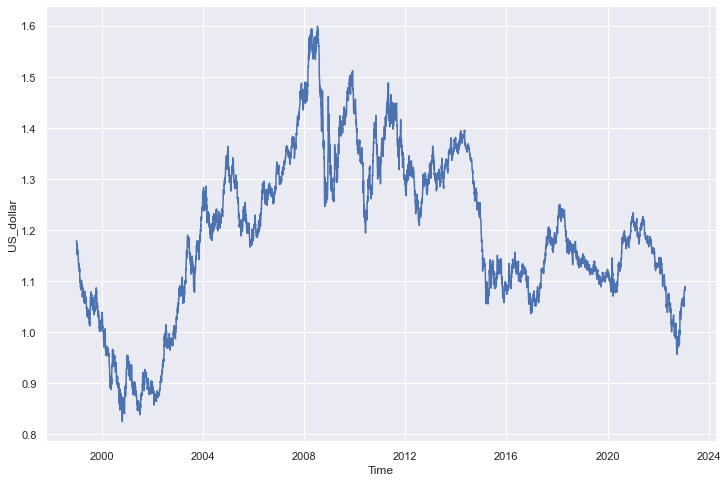

In [10]:
sns.set_theme()
plt.figure(figsize = (12,8))
sns.lineplot(data = us_euro, x = 'Time', y = "US_dollar")
plt.show()

In [11]:
days = [7,30,90, 180, 365]
col_names = ['Rolling_7', 'Rolling_30', 'Rolling_90', 'Rolling_180', 'Rolling_365']

for day, name in zip(days,col_names):
    us_euro[name] = us_euro['US_dollar'].rolling(day).mean()

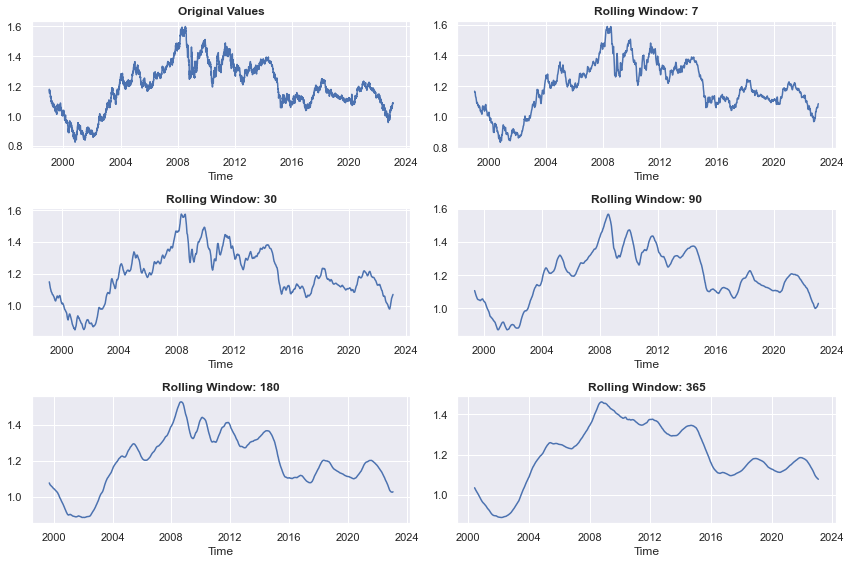

In [12]:
plt.figure(figsize = (12,8))
plt.subplot(3,2,1)
sns.lineplot(data = us_euro, x = 'Time', y = "US_dollar")
plt.title("Original Values", weight = 'bold')
plt.ylabel("")

for i, col,day  in zip([2,3,4,5,6],col_names,days):
    plt.subplot(3,2,i)
    sns.lineplot(data = us_euro, x = 'Time', y = col)
    plt.title("Rolling Window: {}".format(day), weight = "bold")
    plt.ylabel("")

plt.tight_layout()
plt.show()

A rolling window of 30 gives a good summary of the movement of the chart. It shows a good general trend while still holding onto some of the chop instead of making it completely smooth. We will use that rolling mean for further visualizations.

# What to Visualize
We do need to make a decision here on what to actually create. We want to look at things which may affect the exchange rate historically in the United States.
1. Historic periods of financial issues. The big ones in the past that I am interested in are the dotcom bubble (March 2000 - Oct 2002) and the Great Recession (Dec 2007 - June 2009).
2. The Coronavirus pandemic also created a period of extreme volatility in the markets. 
3. Finally as Americans we have a somewhat unique political experience where the nations leadership changes (sometimes drastically) every 4-8 years which can have some potential effect on these exchange rates.

# 1. Financial Crises

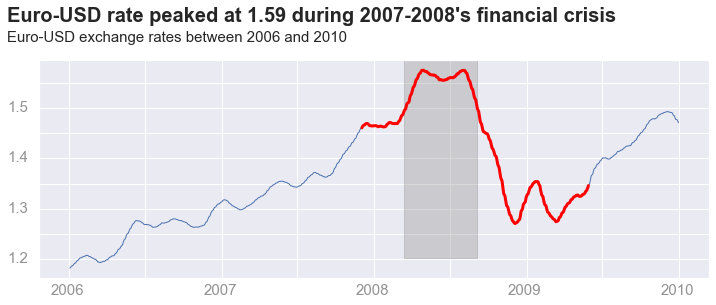

In [13]:
### Adding the plot
fig,ax = plt.subplots(figsize=(12,4))
###Get overall plot range
d1 = us_euro[(us_euro['Time'].dt.year > 2005) & (us_euro['Time'].dt.year < 2010)]
sns.lineplot(data = d1, x = "Time", y = 'Rolling_30', linewidth = 1 )

#Financial crisis range
d2 = us_euro[(us_euro['Time'] > "2007-12-1") & (us_euro['Time'] < "2009-6-1")]
sns.lineplot(data = d2, x = "Time", y = 'Rolling_30', linewidth = 3, color = 'red')

### Highlighting the peak of the crisis
ax.axvspan(xmin= 13950, xmax=14125, ymin=0.09,alpha=0.3, color='grey')
    
### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.xlabel("")
plt.ylabel("")

x = 13105
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=15)
    x += 365
    
y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(13000, y, rate, alpha=0.5, fontsize=15)
    y += 0.1   
    
## Adding a title and a subtitle    
ax.text(13000.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold', size =20)
ax.text(13000, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=15)

plt.show()

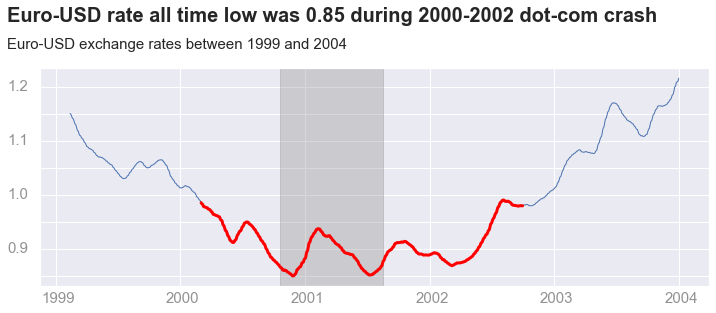

In [14]:
### Adding the plot
fig,ax = plt.subplots(figsize=(12,4))
###Get overall plot range
d3 = us_euro[(us_euro['Time'].dt.year < 2004)]
sns.lineplot(data = d3, x = "Time", y = 'Rolling_30', linewidth = 1 )

#Dotcom crisis range
d4 = us_euro[(us_euro['Time'] > "2000-3-1") & (us_euro['Time'] < "2002-10-1")]
sns.lineplot(data = d4, x = "Time", y = 'Rolling_30', linewidth = 3, color = 'red')

### Highlighting the peak of the crisis
ax.axvspan(xmin= 11250, xmax =11550, ymin=0.00,alpha=0.3, color='grey')
    
### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.xlabel("")
plt.ylabel("")

x = 10550
for year in ['1999', '2000', '2001', '2002', '2003','2004']:
    ax.text(x, 0.8, year, alpha=0.5, fontsize=15)
    x += 365
    
y = 0.893   
for rate in ['0.9','1.0', '1.1', '1.2']:
    ax.text(10450, y, rate, alpha=0.5, fontsize=15)
    y += 0.1   
    
## Adding a title and a subtitle    
ax.text(10450, 1.32, "Euro-USD rate all time low was 0.85 during 2000-2002 dot-com crash",
        weight='bold', size =20)
ax.text(10450, 1.27, 'Euro-USD exchange rates between 1999 and 2004',
        size=15)

plt.show()

We can see that the financial crises had opposite effects on the exchange rate. Perhaps the dot-com bubble affected the european markets more severely to the american markets. I believe the 2008 crash had more to do with the united states real estate and oil crisis which could explain the disparity in strength at that time. An overlay of historical data of european markets and S&P500 could be used as general indicators for these relative markets for further analysis.

# 2. Covid Crash

Markets crashed in march during Covid due to lockdowns announced. Lets see how it affected the exchange rate.

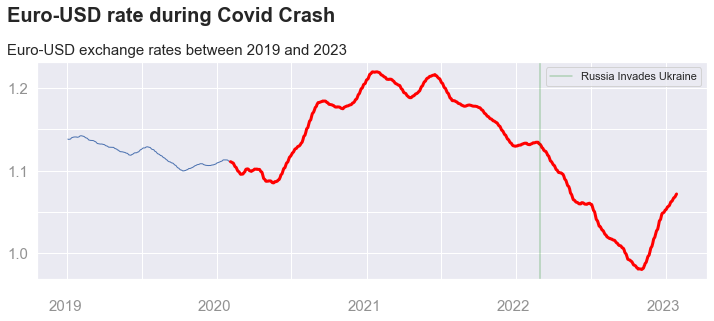

In [15]:
### Adding the plot
fig,ax = plt.subplots(figsize=(12,4))
###Get overall plot range
d4 = us_euro[(us_euro['Time'].dt.year > 2018)]
sns.lineplot(data = d4, x = "Time", y = 'Rolling_30', linewidth = 1 )

#Covid range
d5 = us_euro[(us_euro['Time'] > "2020-2-1")]
sns.lineplot(data = d5, x = "Time", y = 'Rolling_30', linewidth = 3, color = 'red')


    
### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.xlabel("")
plt.ylabel("")

x = 17850
for year in ['2019', '2020', '2021', '2022', '2023']:
    ax.text(x, 0.93, year, alpha=0.5, fontsize=15)
    x += 365
    
y = 0.993   
for rate in ['1.0', '1.1', '1.2']:
    ax.text(17750, y, rate, alpha=0.5, fontsize=15)
    y += 0.1   
    
## Adding a title and a subtitle    
ax.text(17750, 1.28, "Euro-USD rate during Covid Crash",
        weight='bold', size =20)
ax.text(17750, 1.24, 'Euro-USD exchange rates between 2019 and 2023',
        size=15)

##
ax.axvline(19050, alpha = 0.25, color = 'green', label = "Russia Invades Ukraine")
plt.legend()

plt.show()

# 3. Presidency vs Exchange Rate

What we can do is put all 4 presidents since 2000 on individual plots at the top. Then we can combine them into one plot at the bottom.
1. We need to plot the top 4 plots on a 2x4, and leave the bottom row empty.
2. Next we plot the bottom "total" plot on a 2x2, but leave the first row empty. 
3. Then we merge them.

First we need to create some datasets based off of presidencies.

In [16]:
greater_2000 = us_euro.copy(
                   )[(us_euro['Time'].dt.year >= 2001)]
bush = greater_2000.copy()[greater_2000['Time'].dt.year < 2009]
obama = greater_2000.copy()[(greater_2000['Time'].dt.year >= 2009) & (greater_2000['Time'].dt.year < 2017)]
trump = greater_2000.copy()[(greater_2000['Time'].dt.year >= 2017) & (greater_2000['Time'].dt.year < 2021)]
biden = greater_2000.copy()[(greater_2000['Time'].dt.year>= 2021)]


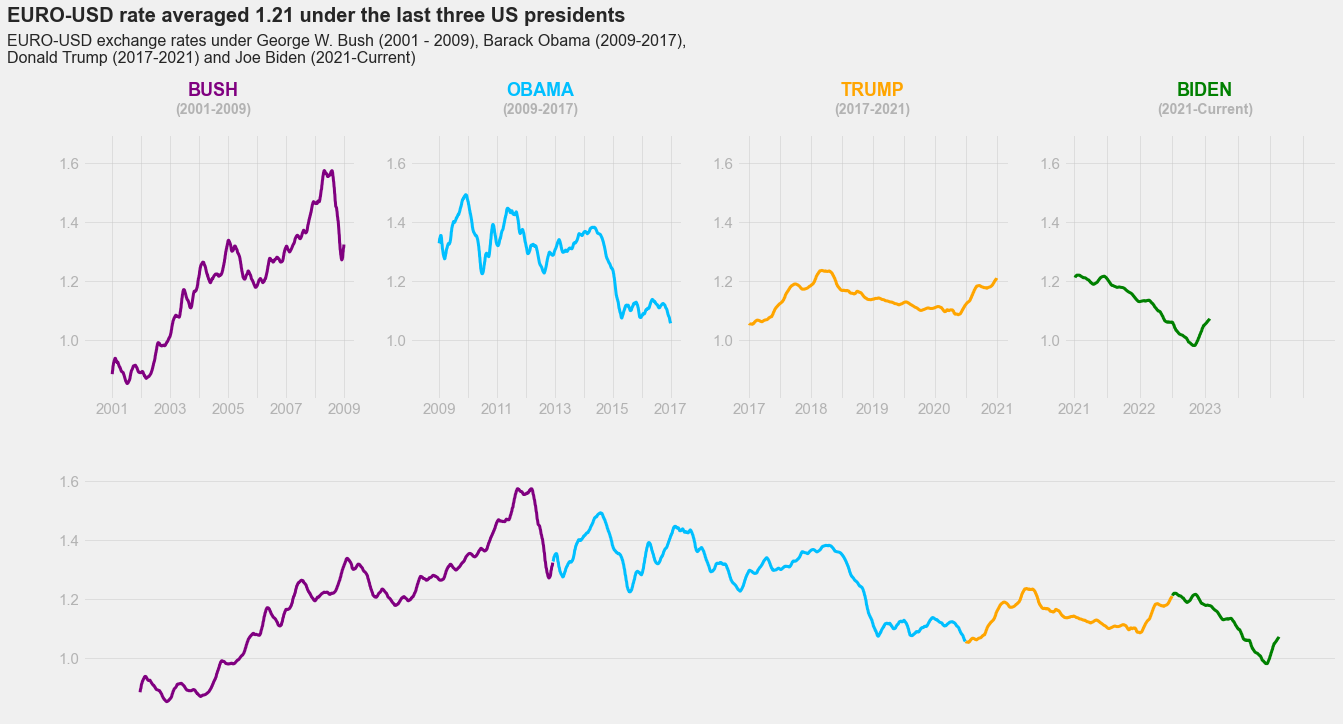

In [17]:
import matplotlib.style as style
style.use('fivethirtyeight')
### Adding the subplots
plt.figure(figsize=(20, 10))
ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)
ax5 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4, ax5 ]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3, fontsize = 15)
    ax.grid(alpha=0.5)    
    
    
### Ax1: Bush
ax1.plot(bush['Time'], bush['Rolling_30'],color='purple', linewidth = 3)
ax1ticks = ax1.get_xticks().tolist()
ax1.set_xticks(ax1ticks)
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'], alpha=0.3, fontsize = 15)
ax1.text(np.mean(ax1ticks), 1.83, 'BUSH', fontsize=18, weight='bold',color='purple', ha  = 'center')
ax1.text(np.mean(ax1ticks), 1.77, '(2001-2009)', weight='bold', alpha=0.3,ha  = 'center')


### Ax2: Obama
ax2.plot(obama['Time'], obama['Rolling_30'], color='deepskyblue',linewidth = 3)
ax2ticks = ax2.get_xticks().tolist()
ax2.set_xticks(ax2ticks)
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'], alpha=0.3, fontsize = 15)
ax2.text(np.mean(ax2ticks), 1.83, 'OBAMA', fontsize=18, weight='bold', color='deepskyblue', ha = 'center')
ax2.text(np.mean(ax2ticks), 1.77, '(2009-2017)', weight='bold', alpha=0.3, ha = 'center')

### ax3: Trump

ax3.plot(trump['Time'], trump['Rolling_30'],
        color='orange', linewidth = 3)

ax3ticks = ax3.get_xticks().tolist()
ax3.set_xticks(ax3ticks)
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'], alpha=0.3, fontsize = 15)
ax3.text(np.mean(ax3ticks), 1.83, 'TRUMP', fontsize=18, weight='bold', color='orange', ha = 'center')
ax3.text(np.mean(ax3ticks), 1.77, '(2017-2021)', weight='bold', alpha=0.3, ha = 'center')

### ax4: Biden
ax4.plot(biden['Time'], biden['Rolling_30'], color='green', linewidth = 3)
ax4.set_xlim(pd.to_datetime(["2020-11-1","2025-1-1"]))

ax4ticks = ax4.get_xticks().tolist()
ax4.set_xticks(ax4ticks)
ax4.set_xticklabels(['2021', '', '2022', '', '2023', '','','',''],alpha=0.3, fontsize = 15)
ax4.text(np.mean(ax4ticks), 1.83, 'BIDEN', fontsize=18, weight='bold', color='green', ha = 'center')
ax4.text(np.mean(ax4ticks), 1.77, '(2021-Current)', weight='bold', alpha=0.3, ha = 'center')

###all of them
ax5.plot(bush['Time'], bush['Rolling_30'],
        color='purple', linewidth = 3)
ax5.plot(obama['Time'], obama['Rolling_30'],
        color='deepskyblue',linewidth = 3)
ax5.plot(trump['Time'], trump['Rolling_30'],
        color='orange', linewidth = 3)
ax5.plot(biden['Time'], biden['Rolling_30'],
        color='green', linewidth = 3)

ax5.set_xticks([])

### Adding a title and a subtitle
ax1.text(10000, 2.08, 'EURO-USD rate averaged {:.2f} under the last three US presidents'.format(np.mean(greater_2000['Rolling_30'])),
         fontsize=20, weight='bold')
ax1.text(10000, 1.94, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
Donald Trump (2017-2021) and Joe Biden (2021-Current)''',
        fontsize=16)

plt.show()